# KPrototypes

KMeans only works with numerical data. Since our dataset has a lot of categorical variables that we can exploit, we decided to try a variation of KMeans known as KPrototypes instead that offers support for both numerical and categorical data. 

KPrototypes is not available in `scikit-learn` but is available via the `kmodes` library.

**Setting up**

In [1]:
%load_ext kedro.ipython
%load_ext autoreload
%matplotlib inline
%autoreload 2

[04/16/23 09:11:07] INFO     Resolved project path as: /home/eckt/Documents/usg.                    ]8;id=367736;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=270422;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#134\134]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[04/16/23 09:11:10] INFO     Kedro project usg                                                      ]8;id=230589;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=9048;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#103\103]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=928388;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=900812;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#104\104]8;;\
                             'pipelines'                                                                           

[04/16/23 09:11:12] INFO     Registered line magic 'run_viz'                                        ]8;id=117484;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=800042;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#110\110]8;;\

In [20]:
import pandas as pd
import polars as pl
import numpy as np

from matplotlib import rc_context
import matplotlib.pyplot as plt
import seaborn as sb
from seaborn.objects import Plot
import seaborn.objects as so

from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

import logging

from usg.utils import *

log = logging.getLogger(__name__)
log.setLevel(logging.INFO)
sb.set()

In [7]:
X = catalog.load('train').set_index('appid')

[04/16/23 09:18:10] INFO     Loading data from 'train' (CSVDataSet)...                          ]8;id=291096;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=670469;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

# Finding best number of clusters using elbow method

In [11]:
def cluster(n=1):
  model = KPrototypes(n_clusters = n, n_jobs = -1, random_state = 0)
  log.info("Performing clustering for n=%d", n)
  y = model.fit_predict(X=X, categorical=list(range(0, len(categorical))))
  log.info("cost[%d]=%.2f", n, model.cost_)
  return model, y

In [12]:
cost = [cluster(i)[0].cost_ for i in range(1, 41)]
cost

[04/16/23 09:20:46] INFO     Performing clustering for n=1                                          ]8;id=196036;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=972835;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 09:21:00] INFO     cost[1]=2761.20                                                        ]8;id=960230;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=666816;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=2                                          ]8;id=433478;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=697015;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 09:21:45] INFO     cost[2]=2337.73                                                        ]8;id=83399;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=80311;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=3                                          ]8;id=222185;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=456207;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 09:22:38] INFO     cost[3]=1859.38                                                        ]8;id=610039;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=532606;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=4                                          ]8;id=21622;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=670282;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 09:23:46] INFO     cost[4]=1557.39                                                        ]8;id=735452;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=709691;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=5                                          ]8;id=972582;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=207033;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 09:25:09] INFO     cost[5]=1372.78                                                        ]8;id=799843;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=513701;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=6                                          ]8;id=951763;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=660350;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 09:27:32] INFO     cost[6]=1246.02                                                        ]8;id=400009;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=422370;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=7                                          ]8;id=62770;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=854620;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 09:30:56] INFO     cost[7]=1149.75                                                        ]8;id=437642;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=835761;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=8                                          ]8;id=803162;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=792325;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 09:34:05] INFO     cost[8]=1072.88                                                        ]8;id=767077;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=180634;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=9                                          ]8;id=309662;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=179915;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 09:37:06] INFO     cost[9]=1043.71                                                        ]8;id=902082;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=406738;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=10                                         ]8;id=749238;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=277486;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 09:45:13] INFO     cost[10]=950.81                                                        ]8;id=279850;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=500862;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=11                                         ]8;id=612087;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=363076;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 09:49:31] INFO     cost[11]=951.52                                                        ]8;id=513998;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=786114;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=12                                         ]8;id=118096;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=419226;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 09:55:41] INFO     cost[12]=929.16                                                        ]8;id=733034;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=727746;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=13                                         ]8;id=280225;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=913023;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 10:02:34] INFO     cost[13]=874.65                                                        ]8;id=96359;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=126236;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=14                                         ]8;id=214130;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=743757;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 10:07:37] INFO     cost[14]=823.42                                                        ]8;id=998729;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=776576;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=15                                         ]8;id=676410;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=565863;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 10:13:18] INFO     cost[15]=801.08                                                        ]8;id=560688;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=674239;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=16                                         ]8;id=928766;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=180336;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 10:18:50] INFO     cost[16]=782.41                                                        ]8;id=868388;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=389109;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=17                                         ]8;id=41071;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=578963;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 10:25:03] INFO     cost[17]=759.92                                                        ]8;id=933857;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=299634;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=18                                         ]8;id=312929;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=234704;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 10:32:17] INFO     cost[18]=765.12                                                        ]8;id=69762;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=694745;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=19                                         ]8;id=448458;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=330891;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 10:41:17] INFO     cost[19]=745.72                                                        ]8;id=331086;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=703803;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=20                                         ]8;id=714154;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=981308;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 10:52:18] INFO     cost[20]=731.57                                                        ]8;id=677044;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=173751;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=21                                         ]8;id=806287;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=177039;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 10:59:54] INFO     cost[21]=679.35                                                        ]8;id=746146;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=719108;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=22                                         ]8;id=552830;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=287748;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 11:11:43] INFO     cost[22]=670.12                                                        ]8;id=918367;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=532257;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=23                                         ]8;id=517751;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=752609;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 11:23:20] INFO     cost[23]=655.87                                                        ]8;id=305885;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=236028;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=24                                         ]8;id=268900;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=687052;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 11:32:19] INFO     cost[24]=669.04                                                        ]8;id=95345;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=587554;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=25                                         ]8;id=584952;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=899330;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 11:44:41] INFO     cost[25]=640.77                                                        ]8;id=383794;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=217343;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

                    INFO     Performing clustering for n=26                                         ]8;id=742706;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=78640;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 cost = [cluster(i)[0].cost_ for i in range(1, 41)]                                           │
│   2 cost                                                                                         │
│   3                                                                                              │
│                                                                                                  │
│ in <listcomp>:1                                                                                  │
│                                                                                                  │
│ ❱ 1 cost = [cluster(i)[0].cost_ for i in range(1, 41)]                                           │
│   2 cost                                                                                         │
│   3                                                                                              │
│                                                                                                  │
│ in cluster:4                                                                                     │
│                                                                                                  │
│   1 def cluster(n=1):                                                                            │
│   2   model = KPrototypes(n_clusters = n, n_jobs = -1, random_state = 0)                         │
│   3   log.info("Performing clustering for n=%d", n)                                              │
│ ❱ 4   y = model.fit_predict(X=X, categorical=list(range(0, len(categorical))))                   │
│   5   log.info("cost[%d]=%.2f", n, model.cost_)                                                  │
│   6   return model, y                                                                            │
│   7                                                                                              │
│                                                                                                  │
│ /home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kmodes/kmodes.py:15 │
│ 4 in fit_predict                                                                                 │
│                                                                                                  │
│   151 │   │   Convenience method; equivalent to calling fit(X) followed by                       │
│   152 │   │   predict(X).                                                                        │
│   153 │   │   """                                                                                │
│ ❱ 154 │   │   return self.fit(X, **kwargs).predict(X, **kwargs)                                  │
│   155 │                                                                                          │
│   156 │   def predict(self, X, **kwargs):                                                        │
│   157 │   │   """Predict the closest cluster each sample in X belongs to.                        │
│                                                                                                  │
│ /home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kmodes/kprototypes. │
│ py:161 in fit                                                                                    │
│                                                                                                  │
│   158 │   │   # If self.gamma is None, gamma will be automatically determined from               │
│   159 │   │   # the data. The function below returns its value.                                  │
│   160 │   │   self._enc_cluster_centroids, self._enc_map, s

In [18]:
c_cost = [
    2761.20, 2337.73, 1859.38, 1557.39, 1372.38,
    1246.02, 1149.75, 1072.88, 1043.71,  950.81,
     951.52,  929.16,  874.65,  823.42,  801.08,
     782.41,  759.92,  765.12,  745.72,  731.57,
     679.35,  670.12,  655.87,  669.04,  640.77,
]

**n=4, n=5, n=6 are good candidates for optimal number of clusters**

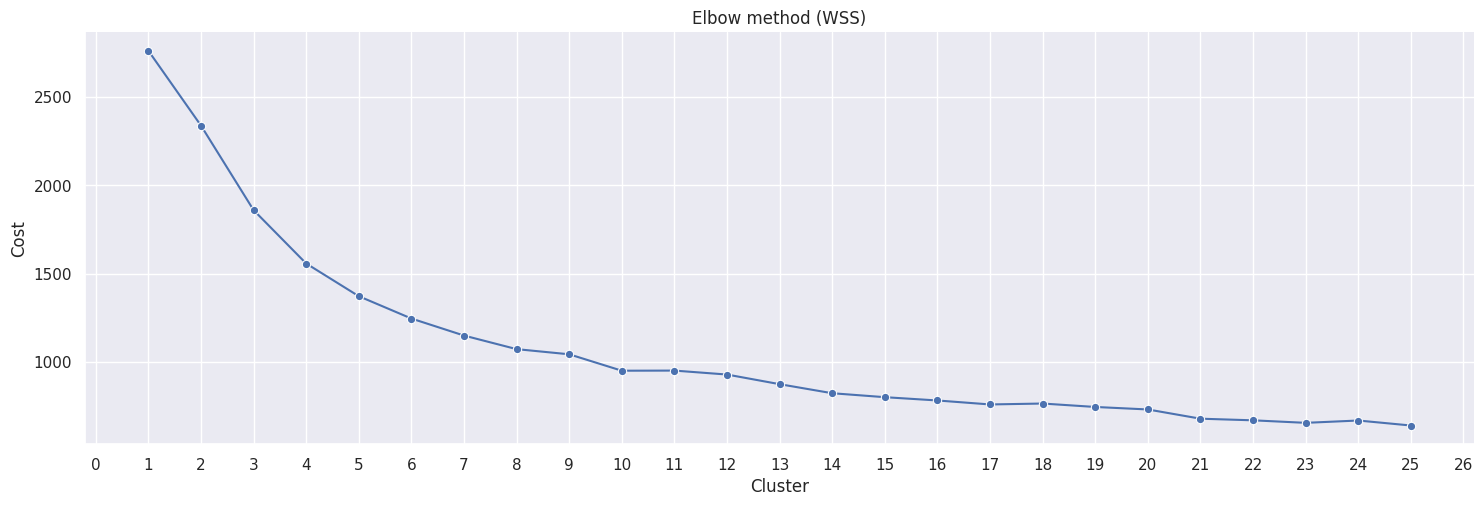

In [19]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':list(range(1, len(c_cost)+1)), 'Cost':c_cost})
ax = sb.relplot(data=df_cost, x='Cluster', y='Cost', marker='o', kind='line', aspect=3).set(title='Elbow method (WSS)')
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
ax

**n=4 is not optimal**

In [21]:
silhouette = [silhouette_score(X=X, labels=cluster(i)[1]) for i in [4,5,6]]
silhouette

[04/16/23 12:04:51] INFO     Performing clustering for n=4                                          ]8;id=869271;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=116587;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 12:06:03] INFO     cost[4]=1557.39                                                        ]8;id=727182;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=287390;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

[04/16/23 12:06:15] INFO     Performing clustering for n=5                                          ]8;id=619349;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=431527;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 12:07:40] INFO     cost[5]=1372.78                                                        ]8;id=363373;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=84134;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

[04/16/23 12:07:53] INFO     Performing clustering for n=6                                          ]8;id=457779;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=251195;file:///tmp/ipykernel_1832/2280664298.py#3\3]8;;\

[04/16/23 12:10:17] INFO     cost[6]=1246.02                                                        ]8;id=207067;file:///tmp/ipykernel_1832/2280664298.py\2280664298.py]8;;\:]8;id=80624;file:///tmp/ipykernel_1832/2280664298.py#5\5]8;;\

[0.05145528106185441, 0.10845620719808273, 0.11683082993668219]

# Summary

We select `n=6` because it has the best silhouette score